In [1]:
from netCDF4 import Dataset
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
ncfile = Dataset(r"D:\data\data\wrf\sx06\wrfout_d01_2021-07-20_12_00_00")

In [2]:
ncfile.variables.items()#变量名描述

dict_items([('Times', <class 'netCDF4._netCDF4.Variable'>
|S1 Times(Time, DateStrLen)
unlimited dimensions: Time
current shape = (1, 19)
filling on, default _FillValue of   used), ('XLAT', <class 'netCDF4._netCDF4.Variable'>
float32 XLAT(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: LATITUDE, SOUTH IS NEGATIVE
    units: degree_north
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 59, 69)
filling on, default _FillValue of 9.969209968386869e+36 used), ('XLONG', <class 'netCDF4._netCDF4.Variable'>
float32 XLONG(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: LONGITUDE, WEST IS NEGATIVE
    units: degree_east
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 59, 69)
filling on, default _FillValue of 9.969209968386869e+36 used), ('LU_INDEX', <class 'netCDF4._netCDF4.Variable'>
float32 LU_INDEX(Time, south_north, west_east)
    Field

In [4]:
p = getvar(ncfile, "pressure")
z = getvar(ncfile, "z")
ht_850 = interplevel(z, p, 850)
ht_850

<xarray.DataArray 'height_interp' (south_north: 59, west_east: 69)>
array([[1448.3632, 1447.4379, 1445.1036, ..., 1351.3949, 1337.228 ,
        1321.3163],
       [1448.1194, 1448.0343, 1447.5907, ..., 1351.653 , 1332.0055,
        1307.2921],
       [1448.0991, 1448.8243, 1448.5796, ..., 1346.342 , 1324.598 ,
        1290.3877],
       ...,
       [      nan,       nan, 1440.2339, ..., 1549.9447, 1550.215 ,
        1550.435 ],
       [      nan,       nan, 1439.2042, ..., 1549.3007, 1549.6586,
        1550.1764],
       [1408.3329,       nan, 1437.6296, ..., 1548.2365, 1548.8918,
        1549.719 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 108.3 108.6 108.8 ... 129.9 130.2
    XLAT     (south_north, west_east) float32 23.71 23.74 23.77 ... 39.31 39.26
    XTIME    float32 360.0
    Time     datetime64[ns] 2021-07-20T12:00:00
    level    int32 850
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    units:          m
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     LambertConformal(stand_lon=118.0, moad_cen_lat=32.0000114...
    missing_value:  9.969209968386869e+36
    _FillValue:     9.969209968386869e+36
    vert_units:     hPa

In [5]:
lats, lons = latlon_coords(ht_850)

In [6]:
to_np(lons).shape

(59, 69)

In [44]:
ua = getvar(ncfile, "ua")
va = getvar(ncfile, "va")
rh = getvar(ncfile, "rh")
u_850 = interplevel(ua, p, 850)
v_850 = interplevel(va, p, 850)
rh_850 = interplevel(rh, p, 850)
v_850

<xarray.DataArray 'va_interp' (south_north: 59, west_east: 69)>
array([[ -0.7720417 ,  -1.4422172 ,  -2.7502444 , ..., -26.000269  ,
        -24.422297  , -20.239803  ],
       [ -0.80533254,  -0.83725053,  -1.3606144 , ..., -25.807913  ,
        -24.317482  , -23.554743  ],
       [ -0.5210277 ,  -0.7006343 ,  -0.2532927 , ..., -27.190351  ,
        -27.408281  , -30.499874  ],
       ...,
       [         nan,          nan,  12.217022  , ...,   1.5733211 ,
          2.8178327 ,   3.6960876 ],
       [         nan,          nan,  11.189366  , ...,   1.6075606 ,
          2.4318025 ,   3.308181  ],
       [  9.239589  ,          nan,  10.471561  , ...,   1.6382092 ,
          2.2291963 ,   2.843227  ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 108.3 108.6 108.8 ... 129.9 130.2
    XLAT     (south_north, west_east) float32 23.71 23.74 23.77 ... 39.31 39.26
    XTIME    float32 360.0
    Time     datetime64[ns] 2021-07-20T12:00:00
    level    int32 850
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    units:          m s-1
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     LambertConformal(stand_lon=118.0, moad_cen_lat=32.0000114...
    missing_value:  9.969209968386869e+36
    _FillValue:     9.969209968386869e+36
    vert_units:     hPa

In [46]:
rh_850.Time

<xarray.DataArray 'Time' ()>
array('2021-07-20T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    XTIME    float32 360.0
    Time     datetime64[ns] 2021-07-20T12:00:00
    level    int32 850

Text(0.0, 1.0, '(a)')

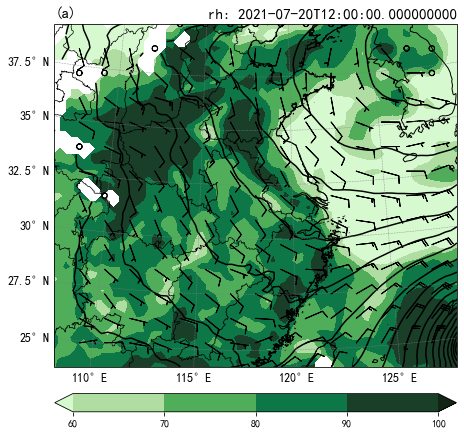

In [143]:
import matplotlib.ticker as mticker
from cartopy.io.shapereader import Reader
import matplotlib
#防止中文出错
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False

cart_proj = get_cartopy(ht_850)

Colors = ["White", "Green3", "Green4", "ForestGreen", "PaleGreen4"]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=cart_proj)
c11 = ax.contourf(to_np(lons),
                  to_np(lats),
                  to_np(rh_850),
                  levels=np.arange(60, 101, 10),
                  cmap=cmaps.cmocean_algae,
                  transform=ccrs.PlateCarree(),
                  extend='both')
ax.contour(to_np(lons),
           to_np(lats),
           to_np(ht_850),
           levels=20,
           colors="black",
           transform=ccrs.PlateCarree())
#plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

plt.barbs(to_np(lons),
          to_np(lats),
          to_np(u_850),
          to_np(v_850),
          regrid_shape=15,
          transform=ccrs.PlateCarree(),
          length=6)
cbar = plt.colorbar(c11, shrink=0.6, pad=0.06, orientation='horizontal')
# Set the map bounds
ax.set_xlim(cartopy_xlim(ht_850))
ax.set_ylim(cartopy_ylim(ht_850))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
lb = ax.gridlines(draw_labels=True,
                  x_inline=False,
                  y_inline=False,
                  linewidth=0.5,
                  color='gray',
                  alpha=0.8,
                  linestyle='--')
lb.top_labels = False
lb.right_labels = None
lb.xlocator = mticker.FixedLocator(range(105, 130, 5))
lb.ylabel_style = {'size': 12, 'color': 'k'}
lb.xlabel_style = {'size': 12, 'color': 'k'}
lb.rotate_labels = False
ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.7)

# ax.set_title('12时的850hPa风场和相对湿度分布图', fontsize=15)
ax.set_title('rh: {}'.format(rh_850.Time.values), loc='right',fontsize=15)
ax.set_title('(a)', loc='left', fontsize=15)


In [31]:
def cal_data(ncfile):
    p = getvar(ncfile, "pressure")
    z = getvar(ncfile, "z")
    ht_850 = interplevel(z, p, 850)
    lats, lons = latlon_coords(ht_850)
    ua = getvar(ncfile, "ua")
    va = getvar(ncfile, "va")
    rh = getvar(ncfile, "rh")
    u_850 = interplevel(ua, p, 850)
    v_850 = interplevel(va, p, 850)
    rh_850 = interplevel(rh, p, 850)
    return  lons,lats,rh_850,ht_850,u_850,v_850

## rh ht uv 叠加图

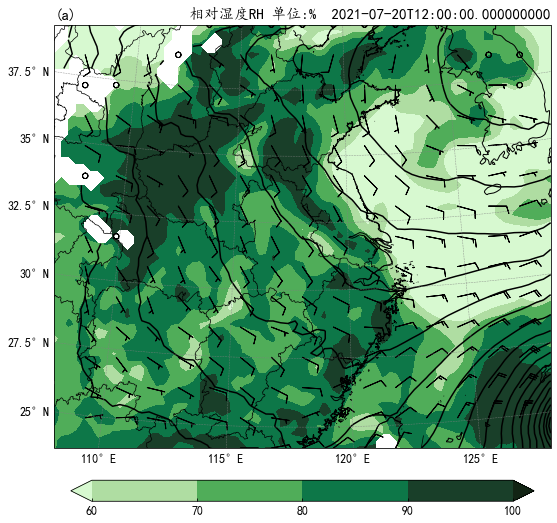

In [25]:
def draw_wrf_rh_ht_uv(ncfile, level, figsize, title_number=None):
    p = getvar(ncfile, "pressure")
    z = getvar(ncfile, "z")
    ht_850 = interplevel(z, p, level)
    lats, lons = latlon_coords(ht_850)
    ua = getvar(ncfile, "ua")
    va = getvar(ncfile, "va")
    rh = getvar(ncfile, "rh")
    u_850 = interplevel(ua, p, level)
    v_850 = interplevel(va, p, level)
    rh_850 = interplevel(rh, p, level)

    cart_proj = get_cartopy(ht_850)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection=cart_proj)

    c11 = ax.contourf(to_np(lons),
                      to_np(lats),
                      to_np(rh_850),
                      levels=np.arange(60, 101, 10),
                      cmap=cmaps.cmocean_algae,
                      transform=ccrs.PlateCarree(),
                      extend='both')
    ax.contour(to_np(lons),
               to_np(lats),
               to_np(ht_850),
               levels=20,
               colors="black",
               transform=ccrs.PlateCarree())
    #plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

    ax.barbs(to_np(lons),
             to_np(lats),
             to_np(u_850),
             to_np(v_850),
             regrid_shape=15,
             transform=ccrs.PlateCarree(),
             length=6)
    cbar = plt.colorbar(c11, shrink=0.55, pad=0.06, orientation='horizontal')
    cbar.ax.tick_params(labelsize=12, direction='in')
    cbar.set_ticks(np.arange(60, 101, 10))

    # Set the map bounds
    ax.set_xlim(cartopy_xlim(ht_850))
    ax.set_ylim(cartopy_ylim(ht_850))
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    lb = ax.gridlines(draw_labels=True,
                      x_inline=False,
                      y_inline=False,
                      linewidth=0.5,
                      color='gray',
                      alpha=0.8,
                      linestyle='--')
    lb.top_labels = False
    lb.right_labels = None
    lb.xlocator = mticker.FixedLocator(range(105, 130, 5))
    lb.ylabel_style = {'size': 12, 'color': 'k'}
    lb.xlabel_style = {'size': 12, 'color': 'k'}
    lb.rotate_labels = False
    ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.7)

    ax.set_title(title_number, loc='left', fontsize=15)
    ax.set_title('相对湿度RH 单位:%  {}'.format(rh_850.Time.values),
                 loc='right',
                 fontsize=15)
    plt.tight_layout()


draw_wrf_rh_ht_uv(ncfile, 850, [12, 8], '(a)')

In [145]:
new_ncfile = Dataset(r"D:\data\data\wrf\sx06\new_wrfout_d01_2021-07-20_12_00_00")

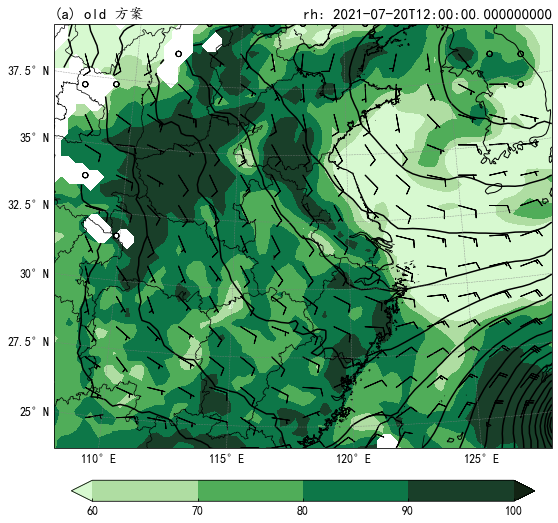

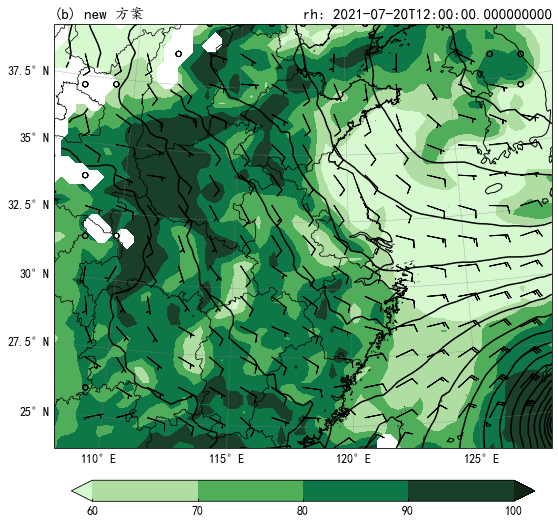

In [177]:
draw_wrf_rh_ht_uv(ncfile,850,[12,8],'(a) old 方案')
draw_wrf_rh_ht_uv(new_ncfile,850,[12,8],'(b) new 方案')
plt.show()

## 两组试验12小时累计降水量之差

In [9]:
def cal_all_prec(ncfile):
    # 累计总积云对流降水量
    pre_1 = getvar(ncfile, "RAINC")
    # 累计总格点降水量
    pre_2 = getvar(ncfile, "RAINNC")
    #总降水量
    pre_all = pre_1 + pre_2
    return pre_all
pre_all=cal_all_prec(ncfile)
new_pre_all=cal_all_prec(new_ncfile)

In [10]:
pre_diff=new_pre_all-pre_all
np.min(pre_diff),np.max(pre_diff)

(<xarray.DataArray ()>
 array(-14.63604164)
 Coordinates:
     XTIME    float32 360.0
     Time     datetime64[ns] 2021-07-20T12:00:00,
 <xarray.DataArray ()>
 array(98.21556854)
 Coordinates:
     XTIME    float32 360.0
     Time     datetime64[ns] 2021-07-20T12:00:00)

Text(0.0, 1.0, '(a)')

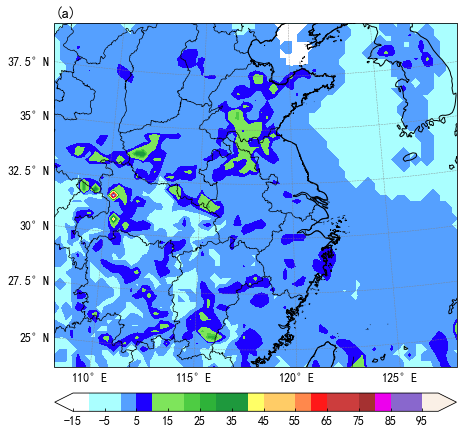

In [22]:
import cmaps
z=getvar(ncfile, "z")
cart_proj = get_cartopy(z)
lats, lons = latlon_coords(z)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=cart_proj)
c11 = ax.contourf(to_np(lons),
                  to_np(lats),
                  to_np(pre_diff),
                  levels=np.arange(-15, 101, 5),
                  cmap=cmaps.prcp_1,
                  transform=ccrs.PlateCarree(),
                  extend='both')


cbar = plt.colorbar(c11, shrink=0.6, pad=0.06, orientation='horizontal')
cbar.ax.tick_params(labelsize=12, direction='in')
cbar.set_ticks(np.arange(-15, 101, 10))
# Set the map bounds
ax.set_xlim(cartopy_xlim(z))
ax.set_ylim(cartopy_ylim(z))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
lb = ax.gridlines(draw_labels=True,
                  x_inline=False,
                  y_inline=False,
                  linewidth=0.5,
                  color='gray',
                  alpha=0.8,
                  linestyle='--')
lb.top_labels = False
lb.right_labels = None
lb.xlocator = mticker.FixedLocator(range(105, 130, 5))
lb.ylabel_style = {'size': 12, 'color': 'k'}
lb.xlabel_style = {'size': 12, 'color': 'k'}
lb.rotate_labels = False
ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.7)

#ax.set_title('12时的850hPa风场和相对湿度分布图', fontsize=15)
ax.set_title('(a)', loc='left', fontsize=15)


## 12时的水汽通量图

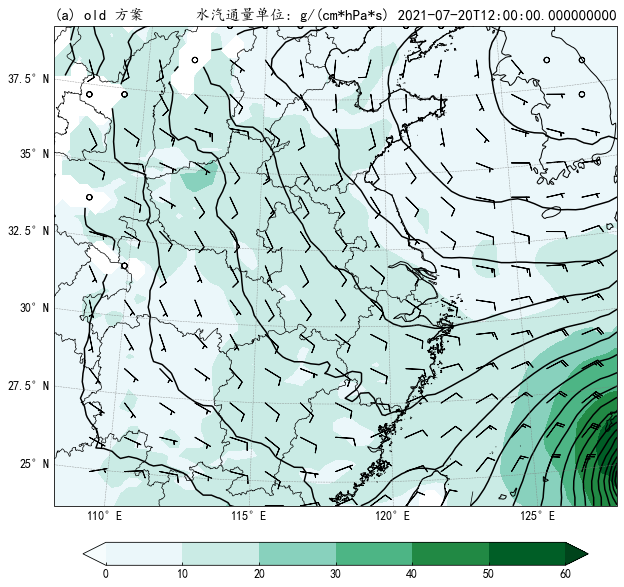

In [18]:
def draw_wrf_vapor_ht_uv(ncfile, level, figsize, title_number=None):
    w = getvar(ncfile, "QVAPOR")
    p = getvar(ncfile, "pressure")
    w_850 = interplevel(w, p, level)
    z = getvar(ncfile, "z")
    ht_850 = interplevel(z, p, level)
    ua = getvar(ncfile, "ua")
    va = getvar(ncfile, "va")
    u_850 = interplevel(ua, p, level)
    v_850 = interplevel(va, p, level)
    lats, lons = latlon_coords(w)
    cart_proj = get_cartopy(w)
    q_850 = w_850 / (1 + w_850)
    qq = ((np.sqrt(u_850**2 + v_850**2)) * q_850) / 9.8 * 1000
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection=cart_proj)
    ax.contour(to_np(lons),
               to_np(lats),
               to_np(ht_850),
               levels=20,
               colors="black",
               zorder=1,
               transform=ccrs.PlateCarree())
    plt.barbs(to_np(lons),
              to_np(lats),
              to_np(u_850),
              to_np(v_850),
              regrid_shape=15,
              zorder=2,
              transform=ccrs.PlateCarree(),
              length=6)
    c11 = ax.contourf(to_np(lons),
                      to_np(lats),
                      to_np(qq),
                      levels=np.arange(0, 61, 10),
                      cmap=cmaps.MPL_BuGn,
                      zorder=0,
                      transform=ccrs.PlateCarree(),
                      extend='both')

    cbar = plt.colorbar(c11, shrink=0.6, pad=0.06, orientation='horizontal')
    cbar.ax.tick_params(labelsize=12, direction='in')
    cbar.set_ticks(np.arange(0, 61, 10))

    # Set the map bounds
    ax.set_xlim(cartopy_xlim(p))
    ax.set_ylim(cartopy_ylim(p))
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    lb = ax.gridlines(draw_labels=True,
                      x_inline=False,
                      y_inline=False,
                      linewidth=0.5,
                      color='gray',
                      alpha=0.8,
                      linestyle='--')

    lb.top_labels = False
    lb.right_labels = None
    lb.xlocator = mticker.FixedLocator(range(105, 130, 5))
    lb.ylabel_style = {'size': 12, 'color': 'k'}
    lb.xlabel_style = {'size': 12, 'color': 'k'}
    lb.rotate_labels = False
    ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.7)

    ax.set_title(title_number, loc='left', fontsize=15)
    ax.set_title('水汽通量单位: g/(cm*hPa*s) {}'.format(w.Time.values),
                 loc='right',
                 fontsize=15)
    plt.tight_layout()


draw_wrf_vapor_ht_uv(ncfile, 850, [12, 9], '(a) old 方案')

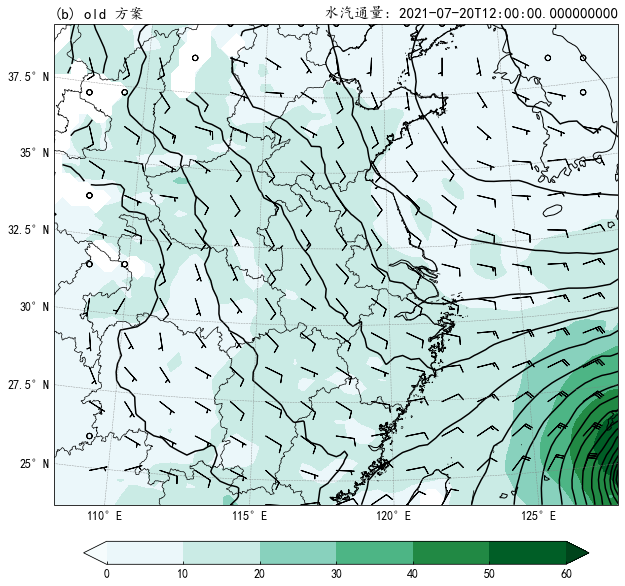

In [179]:
draw_wrf_vapor_ht_uv(new_ncfile,850,[12,9],'(b) old 方案')

# 完整代码

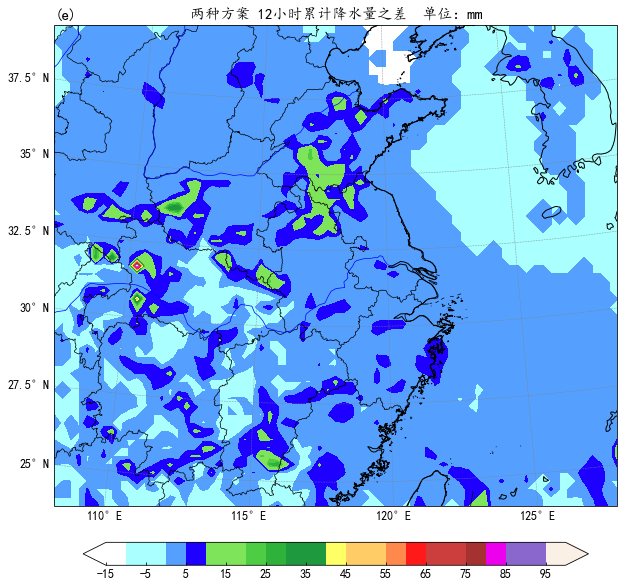

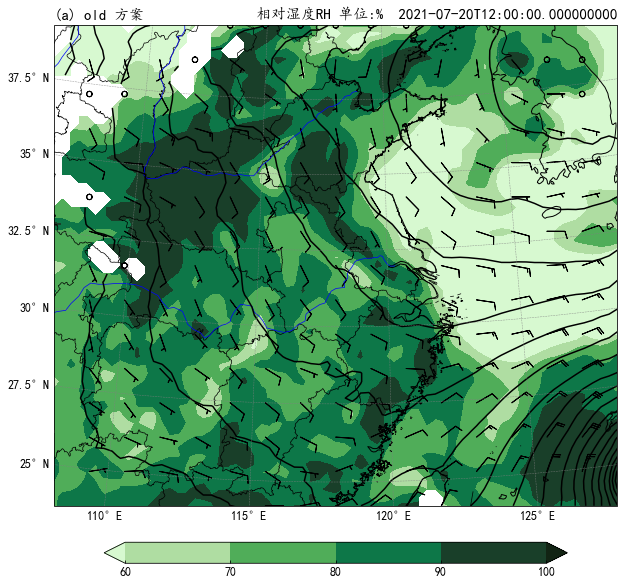

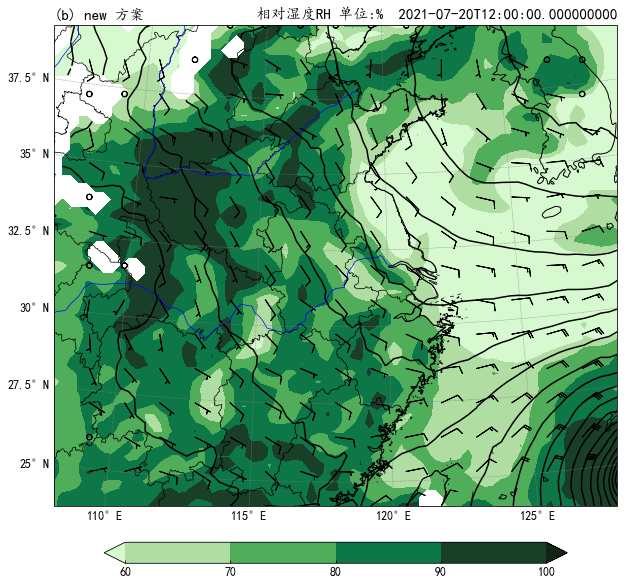

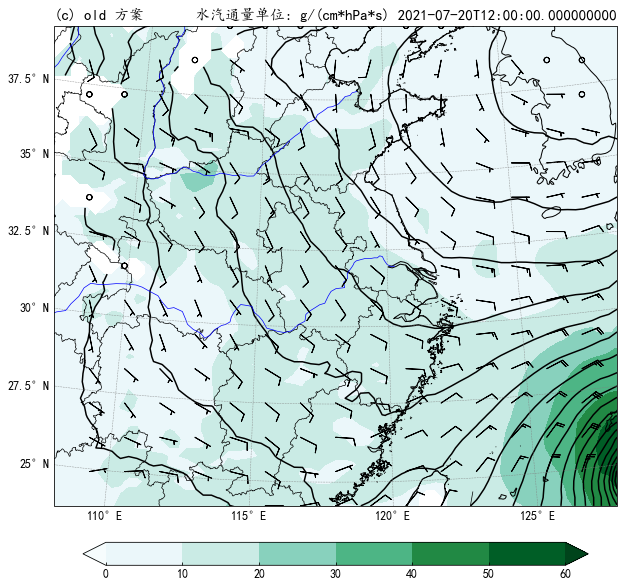

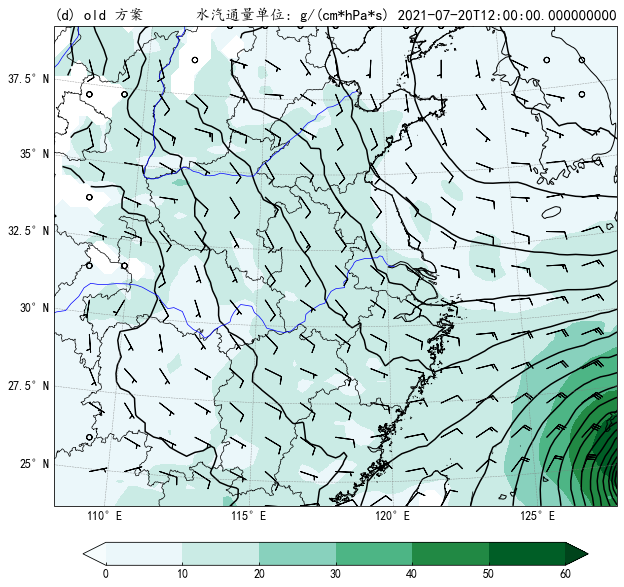

In [27]:
import numpy as np
import cmaps
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
#防止中文出错
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False

ncfile = Dataset(r"D:\data\data\wrf\sx06\wrfout_d01_2021-07-20_12_00_00")
new_ncfile = Dataset(
    r"D:\data\data\wrf\sx06\new_wrfout_d01_2021-07-20_12_00_00")


def lbt_scale(ax, z):
    # Set the map bounds
    ax.set_xlim(cartopy_xlim(z))
    ax.set_ylim(cartopy_ylim(z))
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    lb = ax.gridlines(draw_labels=True,
                      x_inline=False,
                      y_inline=False,
                      linewidth=0.5,
                      color='gray',
                      alpha=0.8,
                      linestyle='--')
    lb.top_labels = False
    lb.right_labels = None
    lb.xlocator = mticker.FixedLocator(range(105, 130, 5))
    lb.ylabel_style = {'size': 12, 'color': 'k'}
    lb.xlabel_style = {'size': 12, 'color': 'k'}
    lb.rotate_labels = False
    ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.7)
    ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='b',
                      linewidth=0.7)


def draw_wrf_rh_ht_uv(ncfile, level, figsize, title_number=None):
    p = getvar(ncfile, "pressure")
    z = getvar(ncfile, "z")
    ht_850 = interplevel(z, p, level)
    lats, lons = latlon_coords(ht_850)
    ua = getvar(ncfile, "ua")
    va = getvar(ncfile, "va")
    rh = getvar(ncfile, "rh")
    u_850 = interplevel(ua, p, level)
    v_850 = interplevel(va, p, level)
    rh_850 = interplevel(rh, p, level)

    cart_proj = get_cartopy(ht_850)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection=cart_proj)

    c11 = ax.contourf(to_np(lons),
                      to_np(lats),
                      to_np(rh_850),
                      levels=np.arange(60, 101, 10),
                      cmap=cmaps.cmocean_algae,
                      transform=ccrs.PlateCarree(),
                      extend='both')
    ax.contour(to_np(lons),
               to_np(lats),
               to_np(ht_850),
               levels=20,
               colors="black",
               transform=ccrs.PlateCarree())
    #plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

    ax.barbs(to_np(lons),
             to_np(lats),
             to_np(u_850),
             to_np(v_850),
             regrid_shape=15,
             transform=ccrs.PlateCarree(),
             length=6)
    cbar = plt.colorbar(c11, shrink=0.55, pad=0.06, orientation='horizontal')
    cbar.ax.tick_params(labelsize=12, direction='in')
    cbar.set_ticks(np.arange(60, 101, 10))

    # Set the map bounds
    lbt_scale(ax, z)

    ax.set_title(title_number, loc='left', fontsize=15)
    ax.set_title('相对湿度RH 单位:%  {}'.format(rh_850.Time.values),
                 loc='right',
                 fontsize=15)
    plt.tight_layout()


def draw_wrf_vapor_ht_uv(ncfile, level, figsize, title_number=None):
    w = getvar(ncfile, "QVAPOR")
    p = getvar(ncfile, "pressure")
    w_850 = interplevel(w, p, level)
    z = getvar(ncfile, "z")
    ht_850 = interplevel(z, p, level)
    ua = getvar(ncfile, "ua")
    va = getvar(ncfile, "va")
    u_850 = interplevel(ua, p, level)
    v_850 = interplevel(va, p, level)
    lats, lons = latlon_coords(w)
    cart_proj = get_cartopy(w)
    q_850 = w_850 / (1 + w_850)
    qq = ((np.sqrt(u_850**2 + v_850**2)) * q_850) / 9.8 * 1000
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection=cart_proj)
    ax.contour(to_np(lons),
               to_np(lats),
               to_np(ht_850),
               levels=20,
               colors="black",
               zorder=1,
               transform=ccrs.PlateCarree())
    plt.barbs(to_np(lons),
              to_np(lats),
              to_np(u_850),
              to_np(v_850),
              regrid_shape=15,
              zorder=2,
              transform=ccrs.PlateCarree(),
              length=6)
    c11 = ax.contourf(to_np(lons),
                      to_np(lats),
                      to_np(qq),
                      levels=np.arange(0, 61, 10),
                      cmap=cmaps.MPL_BuGn,
                      zorder=0,
                      transform=ccrs.PlateCarree(),
                      extend='both')

    cbar = plt.colorbar(c11, shrink=0.6, pad=0.06, orientation='horizontal')
    cbar.ax.tick_params(labelsize=12, direction='in')
    cbar.set_ticks(np.arange(0, 61, 10))

    # Set the map bounds
    lbt_scale(ax, z)
    ax.set_title(title_number, loc='left', fontsize=15)
    ax.set_title('水汽通量单位: g/(cm*hPa*s) {}'.format(w.Time.values),
                 loc='right',
                 fontsize=15)
    plt.tight_layout()


def cal_all_prec(ncfile):
    # 累计总积云对流降水量
    pre_1 = getvar(ncfile, "RAINC")
    # 累计总格点降水量
    pre_2 = getvar(ncfile, "RAINNC")
    #总降水量
    pre_all = pre_1 + pre_2
    return pre_all


pre_all = cal_all_prec(ncfile)
new_pre_all = cal_all_prec(new_ncfile)
pre_diff = new_pre_all - pre_all
z = getvar(ncfile, "z")
cart_proj = get_cartopy(z)
lats, lons = latlon_coords(z)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection=cart_proj)
c11 = ax.contourf(to_np(lons),
                  to_np(lats),
                  to_np(pre_diff),
                  levels=np.arange(-15, 101, 5),
                  cmap=cmaps.prcp_1,
                  transform=ccrs.PlateCarree(),
                  extend='both')

cbar = plt.colorbar(c11, shrink=0.6, pad=0.06, orientation='horizontal')
cbar.ax.tick_params(labelsize=12, direction='in')
cbar.set_ticks(np.arange(-15, 101, 10))
lbt_scale(ax, z)

ax.set_title('(e)', loc='left', fontsize=15)
ax.set_title('两种方案 12小时累计降水量之差  单位：mm', fontsize=15)
plt.tight_layout()
plt.savefig(r"D:\data\data\wrf\sx06\prec_diff.jpg",
            dpi=300,
            bbox_inches='tight')

draw_wrf_rh_ht_uv(ncfile, 850, [12, 9], '(a) old 方案')
plt.savefig(r"D:\data\data\wrf\sx06\rh.jpg", dpi=300, bbox_inches='tight')
draw_wrf_rh_ht_uv(new_ncfile, 850, [12, 9], '(b) new 方案')
plt.savefig(r"D:\data\data\wrf\sx06\rh_new.jpg", dpi=300, bbox_inches='tight')
draw_wrf_vapor_ht_uv(ncfile, 850, [12, 9], '(c) old 方案')
plt.savefig(r"D:\data\data\wrf\sx06\water_vapor.jpg",
            dpi=300,
            bbox_inches='tight')
draw_wrf_vapor_ht_uv(new_ncfile, 850, [12, 9], '(d) old 方案')
plt.savefig(r"D:\data\data\wrf\sx06\new_water_vapor.jpg",
            dpi=300,
            bbox_inches='tight')
plt.show()

# 最后修改为 2022-05-28-11:00
# 若有错误请联系 845728580@qq.com 订正